Importing and Loading the Dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [13]:
sns.set_theme(style="whitegrid")

In [14]:
PROJECT_ROOT = Path("..").resolve()
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"

In [15]:
print("Project root:", PROJECT_ROOT)
print("Processed directory:", PROCESSED_DIR)

Project root: /Users/sanjaydilip/Desktop/Code/Projects/Movie Recommender
Processed directory: /Users/sanjaydilip/Desktop/Code/Projects/Movie Recommender/data/processed


Loading Pipeline Outputs

In [16]:
merged = pd.read_csv(PROCESSED_DIR / "merged.csv")
genres = pd.read_csv(PROCESSED_DIR / "movie_genres.csv")
train = pd.read_csv(PROCESSED_DIR / "train.csv")
test = pd.read_csv(PROCESSED_DIR / "test.csv")
user_map = pd.read_csv(PROCESSED_DIR / "user_map.csv")
movie_map = pd.read_csv(PROCESSED_DIR / "movie_map.csv")

Dataset shapes

In [17]:
merged.head()

,user_id,movie_id,u_index,m_index,rating,timestamp,title,genres
0,1,1193,0,0,5.0,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,0,1,3.0,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,0,2,3.0,2000-12-31 22:32:48,My Fair Lady (1964),Musical|Romance
3,1,3408,0,3,4.0,2000-12-31 22:04:35,Erin Brockovich (2000),Drama
4,1,2355,0,4,5.0,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [18]:
print("Merged shape:", merged.shape)
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Merged shape: (1000209, 8)
Train shape: (802553, 8)
Test shape: (197656, 8)


In [19]:
print("Unique users:", merged['u_index'].nunique())
print("Unique movies:", merged['m_index'].nunique())

Unique users: 6040
Unique movies: 3706


Rating distribution

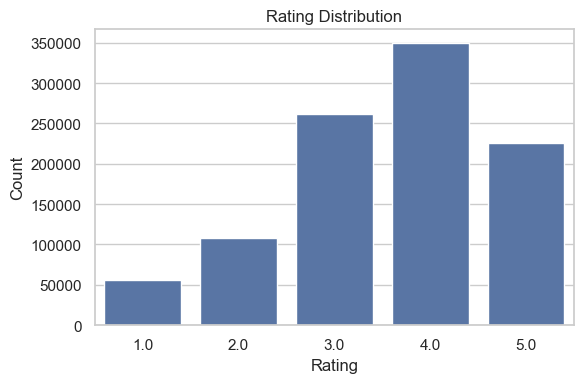

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x="rating", data=merged)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Genre distribution

In [24]:
genre_counts = (
    genres['genre']
    .value_counts()
    .reset_index()
)

In [25]:
genre_counts.columns = ['Genre', 'Count']
genre_counts

,Genre,Count
0,Drama,1493
1,Comedy,1163
2,Action,495
3,Thriller,485
4,Romance,459
5,Horror,339
6,Adventure,281
7,Sci-Fi,274
8,Children's,250
9,Crime,201


Plotting common genres

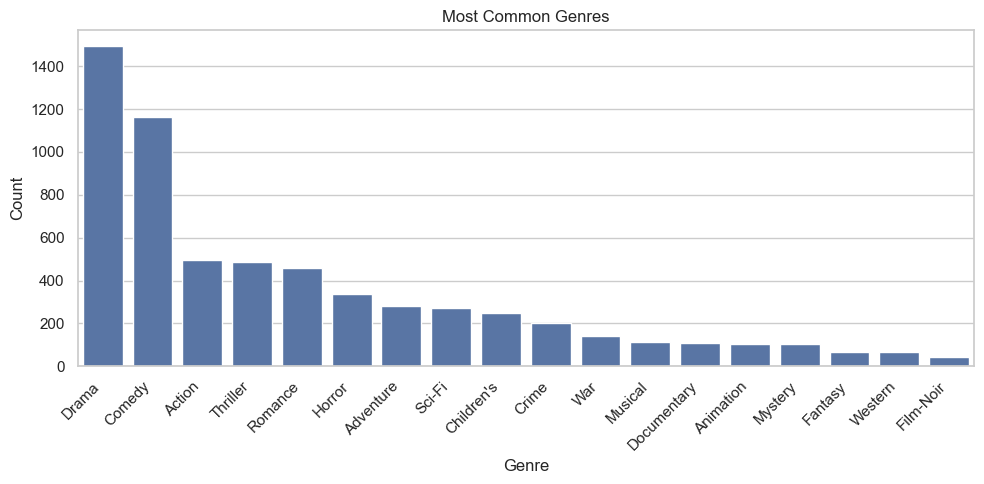

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Genre", y="Count", data=genre_counts)
plt.xticks(rotation=45, ha="right")
plt.title("Most Common Genres")
plt.tight_layout()
plt.show()

Rating stats

In [27]:
merged['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Time distribution

In [28]:
merged['timestamp'] = pd.to_datetime(merged['timestamp'])

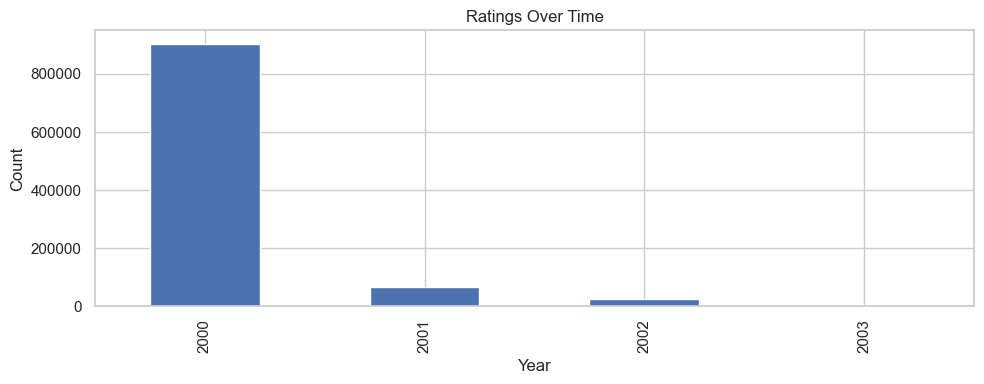

In [29]:
plt.figure(figsize=(10, 4))
merged['timestamp'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Verifying train/test split

In [30]:
print("Train earliest:", train['timestamp'].min())
print("Train latest:", train['timestamp'].max())

Train earliest: 2000-04-25 23:05:32
Train latest: 2003-02-24 17:03:39


In [31]:
print("Test earliest:", test['timestamp'].min())
print("Test latest:", test['timestamp'].max())

Test earliest: 2000-04-25 23:42:28
Test latest: 2003-02-28 17:49:50


Summary

In [32]:
summary = {
    "n_users": merged['u_index'].nunique(),
    "n_movies": merged['m_index'].nunique(),
    "total_ratings": len(merged),
    "train_ratings": len(train),
    "test_ratings": len(test),
}

In [33]:
pd.DataFrame([summary]).to_csv(PROCESSED_DIR / "eda_summary.csv", index=False)
print("Saved EDA summary.")


Saved EDA summary.
